# **Group Information** 👥

**Group #4**

- Khalid Mari Al Dhafeeri – 2200003420
- Hussain Saleh Mohsen – 2200009093
- Abdulmalik Khalid Fagi – 2190005953


# **1. Introduction** 🦁📊

This project focuses on constructing a deep learning model for animal classification using EfficientNetB3 [[1]](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB3), an advanced convolutional neural network architecture. EfficientNetB3 is noted for its mix of performance and computational efficiency, making it a good choice for a variety of image classification applications.

**Computer Vision** is a branch of artificial intelligence that allows computers to comprehend and make judgments based on visual data from the environment [[2]](https://ieeexplore.ieee.org/document/6126544). It has a wide range of applications, including object identification, facial recognition, self-driving cars, and medical picture analysis. Deep learning approaches can help computer vision systems achieve high accuracy in tasks that involve comprehending and interpreting complicated visual input.

For this project, we used data from **Kaggle.com**, a popular site for data science and machine learning contests. Kaggle offers data scientists a massive record of datasets as well as a collaborative environment in which to create and enhance models. The dataset utilized in this study was obtained from Kaggle [[3]](https://www.kaggle.com/datasets/alessiocorrado99/animals10), which provided a broad and vast collection of photos for training and assessing our model.



# **2. Project Goals and Objectives** 🎯

The primary goal of this research is to create an efficient and accurate model for animal classification based on the EfficientNetB3 architecture. To achieve this, we have set the following specific goals:

1. **Dataset Selection** 🗂️📷: Use a broad and diversified animal picture dataset from Kaggle, ensuring a variety of animal species to build a robust model that can generalize across different types of photos.

2. **Data Preprocessing and Augmentation** 🧹🔄: Apply data preprocessing techniques and data augmentation methods to increase the variety of the training dataset, allowing the model to generalize and perform well on new data.

3. **Model Development** 🏗️🤖: Utilize the EfficientNetB3 architecture to develop the animal classification model, benefiting from its efficient scalability and balanced performance. Implement custom layers and fine-tune the pre-trained model for identifying animals.

4. **Model Training and Optimization** 🎓⚙️: Train the model using appropriate loss functions, optimizers, and evaluation measures. Optimize the model's hyperparameters to achieve peak performance while maintaining computational efficiency.

# **3. Description of dataset** 📸

This experiment utilizes the Animals-10 dataset from Kaggle [[3]](https://www.kaggle.com/datasets/alessiocorrado99/animals10), which contains photos of ten distinct animal classes: dog, cat, horse, spider, butterfly, chicken, sheep, cow, squirrel, and elephant. The dataset consists of 28,706 pictures with varying sample sizes per class.

#### **Preprocessing Steps**:

1. **Data Download and Extraction**: The dataset was obtained from Kaggle and extracted, with photos organized into folders according to their labels.
2. **Data Cleaning**: Eliminated corrupted or non-image files to ensure the dataset only comprised genuine image files.
3. **Data Augmentation**: Applied rotation, zooming, and horizontal flipping using `ImageDataGenerator` to improve the training dataset's variability and resilience.
4. **Data Splitting**: Divided the dataset into training, validation, and test sets to accurately evaluate the model's performance.
5. **Normalization**: Normalize the input data and enhance the model's training efficiency.

# 4. **Methodlogy**
The methodology depicted in the diagram outlines a systematic approach for developing a deep learning model using transfer learning with EfficientNetB3. It consists of seven primary steps: Data Collection, Data Preparation (including data splitting into training, testing, and validation sets), Model Training (utilizing feature extraction from EfficientNetB3), Hyperparameter Tuning, further Model Training with optimized parameters, Model Evaluation, and finally, Model Deployment. This sequence emphasizes iterative improvement and evaluation to optimize model performance.

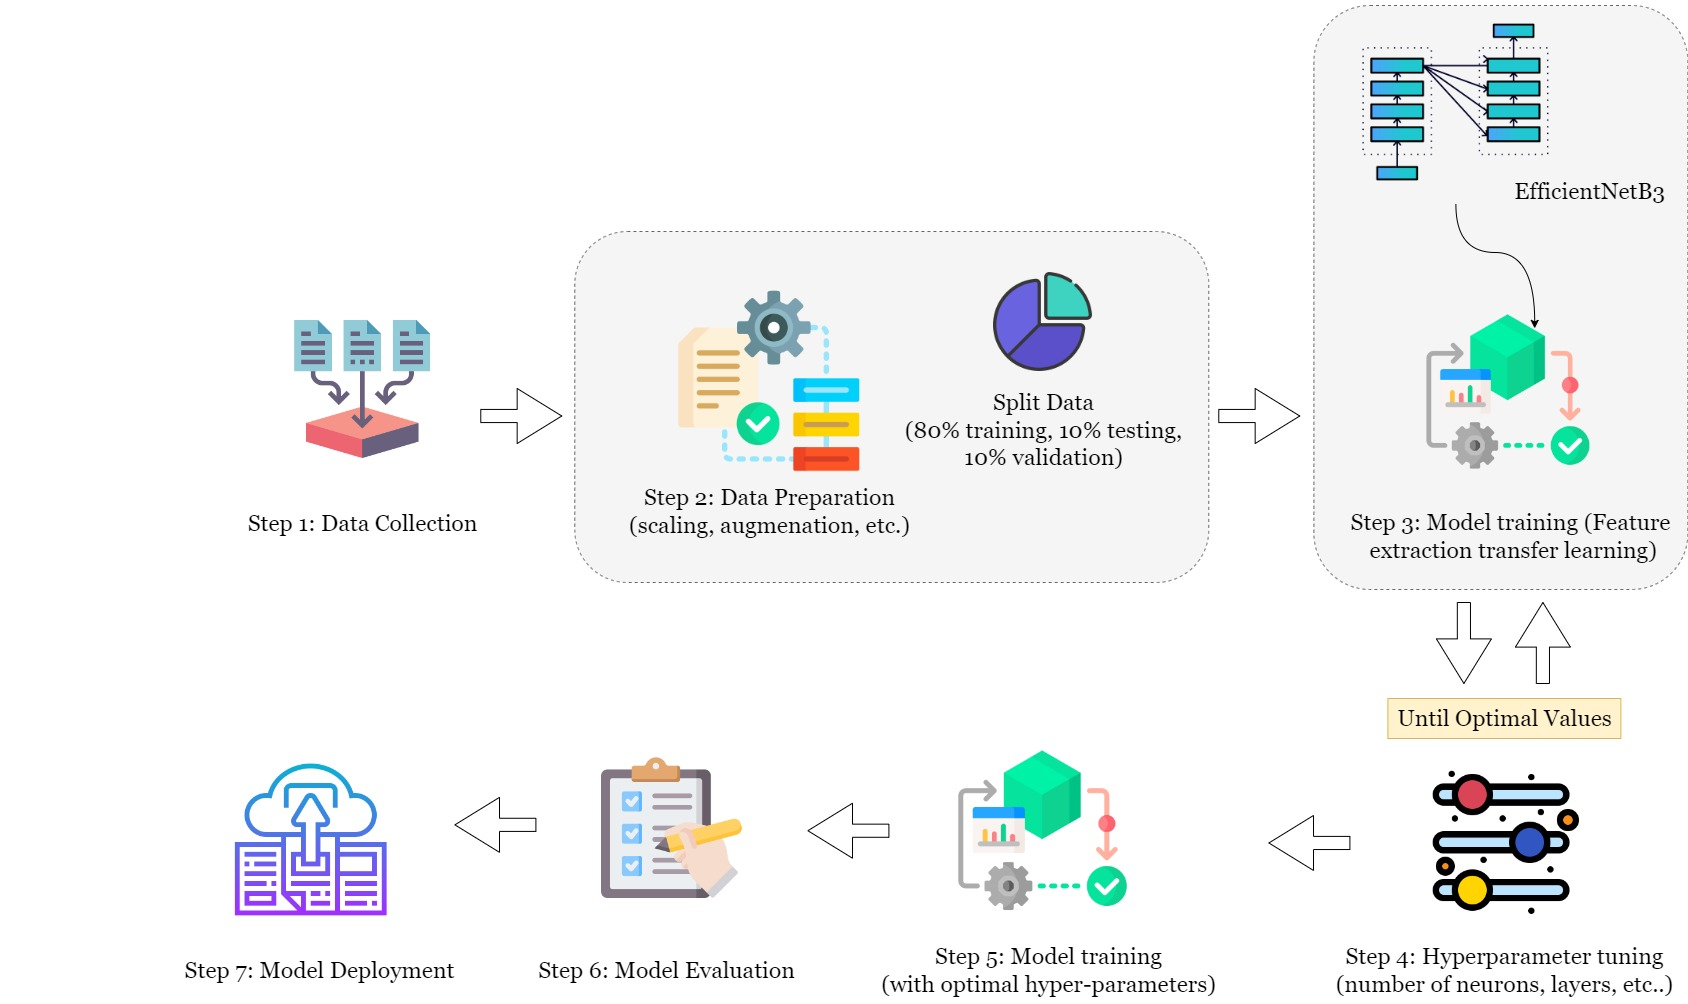







# **5. Implementation** 🛠️📊

This section details the implementation of the animal classification model using EfficientNetB3, covering the following key steps: downloading and unzipping the dataset from Kaggle, importing necessary libraries, and preparing the data through cleaning, formatting, and augmentation. It also includes setting up callbacks to optimize training, visualizing training history to monitor progress, creating a confusion matrix to evaluate performance, and building, compiling, and training the model. Finally, the model's performance is evaluated on training, validation, and test datasets to ensure accuracy and efficiency and then deploy the model.

## Importing Libraries

In [ ]:
# Import system libraries
import os
import time
import shutil
import pathlib
import itertools
import gdown
import zipfile

# Import data handling libraries
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping


# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

print('Modules loaded.')

Modules loaded.


## Downloading and Unzipping Data


In [ ]:
url = 'https://drive.google.com/uc?id=1R8N_qKo20OyXhfH_8hE3nEzHqV14aAPA'
output = 'raw-img.zip'  # Change the filename and extension as needed
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1R8N_qKo20OyXhfH_8hE3nEzHqV14aAPA
From (redirected): https://drive.google.com/uc?id=1R8N_qKo20OyXhfH_8hE3nEzHqV14aAPA&confirm=t&uuid=6e84027c-535e-4cf9-9447-358eafabf3b9
To: /content/raw-img.zip
100%|██████████| 614M/614M [00:07<00:00, 78.5MB/s]


'raw-img.zip'

In [ ]:
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

unzip_data('raw-img.zip')

## **Data Preparation**

The Data Preparation section encompasses all preprocessing steps necessary before training a machine learning model. These steps include cleaning and formatting the data to ensure it is in a suitable state for model ingestion [[4]](https://jonathan-hui.medium.com/tensorflow-dataset-data-preparation-b81fcf9c3c44). This involves generating a clean DataFrame, setting up image generation from the DataFrame, and displaying a sample of the data to verify correctness.

### Create Data Frame

The first step in data preparation is to organize the raw data into a structured format. This involves:

- **Extracting file paths and labels**: Scanning directories containing the data and extracting each file's path and its corresponding label.
- **Building a DataFrame**: These paths and labels are then combined into a pandas DataFrame, which serves as a centralized data structure for easy access and manipulation of the data.

In [ ]:
def define_paths(data_dir):
    """
    Generate file paths and labels for images stored in a directory structure.

    Args:
    data_dir (str): Root directory containing class-specific subdirectories.

    Returns:
    tuple: Lists of file paths and their corresponding labels.
    """
    filepaths = []
    labels = []

    # List all subdirectories in the data directory
    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)

        # Append each file path and its label (the folder name)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels

def define_df(files, classes):
    """
    Concatenate file paths and labels into a single DataFrame.

    Args:
    files (list): List of file paths.
    classes (list): List of labels corresponding to file paths.

    Returns:
    DataFrame: Pandas DataFrame containing the file paths and labels.
    """
    # Create series for file paths and labels
    Fseries = pd.Series(files, name='filepaths')
    Lseries = pd.Series(classes, name='labels')

    # Concatenate series into a DataFrame
    return pd.concat([Fseries, Lseries], axis=1)

def split_data(data_dir):
    """
    Split data into training, validation, and testing dataframes.

    Args:
    data_dir (str): Root directory containing class-specific subdirectories.

    Returns:
    tuple: DataFrames for training, validation, and testing datasets.
    """
    # Generate file paths and labels
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)

    # Split DataFrame into training and remaining data
    train_df, dummy_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42, stratify=df['labels'])

    # Split the remaining data into validation and test sets
    valid_df, test_df = train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=42, stratify=dummy_df['labels'])

    return train_df, valid_df, test_df

### Generate Images from DataFrame

Once the data is structured in a DataFrame:

- **Set up Data Generators**: Utilize TensorFlow's `ImageDataGenerator` to prepare image data generators. These are crucial for model training as they can automatically apply data augmentation techniques, helping to improve model generalizability.
- **Configuration**: Configure the generators to automatically resize images, apply specified augmentations like horizontal flipping, and batch the images to be ready for model training.

In [ ]:
def create_gens(train_df, valid_df, test_df, batch_size):
    """
    This function fits train, validation, and test dataframes into image data generators.
    Image data generators convert images into tensors for model input.

    Args:
    train_df (DataFrame): DataFrame containing training data file paths and labels.
    valid_df (DataFrame): DataFrame containing validation data file paths and labels.
    test_df (DataFrame): DataFrame containing test data file paths and labels.
    batch_size (int): Number of samples per batch.

    Returns:
    tuple: Training, validation, and test data generators.
    """

    # Define image size and parameters
    img_size = (224, 224)  # Image dimensions (height, width)
    channels = 3  # Number of color channels (3 for RGB)
    color = 'rgb'  # Color mode

    # Determine the optimal test batch size
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
    test_steps = ts_length // test_batch_size

    # Scalar function for image preprocessing (identity function in this case)
    def scalar(img):
        return img

    # Initialize ImageDataGenerators with preprocessing and augmentation
    tr_gen = ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
    ts_gen = ImageDataGenerator(preprocessing_function=scalar)

    # Create data generators for training, validation, and test datasets
    train_gen = tr_gen.flow_from_dataframe(
        train_df,
        x_col='filepaths',
        y_col='labels',
        target_size=img_size,
        class_mode='categorical',
        color_mode=color,
        shuffle=True,
        batch_size=batch_size
    )

    valid_gen = ts_gen.flow_from_dataframe(
        valid_df,
        x_col='filepaths',
        y_col='labels',
        target_size=img_size,
        class_mode='categorical',
        color_mode=color,
        shuffle=True,
        batch_size=batch_size
    )

    # Note: Using custom test_batch_size and no shuffling for test data
    test_gen = ts_gen.flow_from_dataframe(
        test_df,
        x_col='filepaths',
        y_col='labels',
        target_size=img_size,
        class_mode='categorical',
        color_mode=color,
        shuffle=False,
        batch_size=test_batch_size
    )

    return train_gen, valid_gen, test_gen

### Display Data Sample

To ensure that the data has been loaded and processed correctly:

- **Visual Inspection**: A function is implemented to fetch and display a batch of images from the generator. This allows for visual inspection of the preprocessed images to ensure that augmentations are applied correctly and the data is in the expected format.
- **Debugging and Verification**: This step is also useful for debugging the data pipeline, allowing quick identification and rectification of issues in the data loading and augmentation process.

In [ ]:
def show_images(gen):
    """
    This function takes a data generator and displays a sample of the images.

    Args:
    gen (DataFrameIterator): Data generator that yields batches of images and labels.

    Returns:
    None
    """

    # Retrieve class indices and corresponding class names
    g_dict = gen.class_indices  # Dictionary {'class': index}
    classes = list(g_dict.keys())  # List of class names

    # Get a batch of images and labels from the generator
    images, labels = next(gen)

    # Determine the number of images to display
    length = len(labels)  # Length of batch size
    sample = min(length, 25)  # Display up to 25 images

    # Create a figure to display the images
    plt.figure(figsize=(20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)  # Create a subplot for each image
        image = images[i] / 255  # Scale image data to range (0 - 255)
        plt.imshow(image)  # Display the image
        index = np.argmax(labels[i])  # Get the index of the highest probability label
        class_name = classes[index]  # Get the class name corresponding to the index
        plt.title(class_name, color='blue', fontsize=12)  # Set the title as the class name
        plt.axis('off')  # Hide the axis

    plt.show()  # Display the figure

## Callbacks

Callbacks are helpful functions that optimize the model training process by providing more control and flexibility [[5]](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback). They can be used for various purposes, such as:

- Stopping model training after a specific duration.
- Halting training if there is no improvement in accuracy or other metrics.
- Adjusting learning rates dynamically based on performance metrics.
- Saving the model at certain intervals or when achieving new best performance.

Callbacks enhance the training workflow by automating these and other similar tasks, thereby improving the efficiency and effectiveness of the model development process.

In [ ]:
class MyCallback(Callback):
    """
    Custom callback to optimize model training by reducing the learning rate
    and implementing early stopping based on validation loss.

    Args:
    model (tf.keras.Model): The model being trained.
    patience (int): Number of epochs with no improvement after which learning rate will be reduced.
    stop_patience (int): Number of times to reduce learning rate without improvement before stopping training.
    threshold (float): Threshold for validation loss to decide when to stop.
    factor (float): Factor by which the learning rate will be reduced.
    epochs (int): Total number of epochs for training.
    """

    def __init__(self, model, patience, stop_patience, threshold, factor, epochs):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience  # Number of epochs with no improvement before reducing learning rate
        self.stop_patience = stop_patience  # Number of times to reduce learning rate before stopping training
        self.threshold = threshold  # Threshold for deciding when to stop
        self.factor = factor  # Factor by which to reduce the learning rate
        self.epochs = epochs  # Total number of epochs
        self.best_weights = model.get_weights()  # Initial best weights
        self.wait = 0  # Counter for epochs with no improvement
        self.stopped_epoch = 0  # Epoch at which training was stopped
        self.best = np.Inf  # Best validation loss initialized to infinity
        self.best_epoch = 0  # Epoch at which the best validation loss was achieved

    def on_train_begin(self, logs=None):
        """
        Called at the beginning of training. Initializes the state.
        """
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf
        self.best_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        """
        Called at the end of each epoch. Checks validation loss and adjusts learning rate
        or stops training if necessary.

        Args:
        epoch (int): The current epoch number.
        logs (dict): Dictionary of logs from the epoch.
        """
        current_val_loss = logs.get('val_loss')  # Get current validation loss
        if current_val_loss < self.best:
            self.best = current_val_loss  # Update best validation loss
            self.best_epoch = epoch  # Update best epoch
            self.best_weights = self.model.get_weights()  # Update best weights
            self.wait = 0  # Reset wait counter
        else:
            self.wait += 1  # Increment wait counter
            if self.wait >= self.patience:
                # Reduce learning rate
                current_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
                new_lr = current_lr * self.factor
                tf.keras.backend.set_value(self.model.optimizer.learning_rate, new_lr)
                print("\nEpoch %05d: ReduceLROnPlateau reducing learning rate to %s." % (epoch + 1, new_lr))
                if self.wait >= self.stop_patience:
                    # Stop training
                    self.stopped_epoch = epoch
                    self.model.stop_training = True
                    print("Epoch %05d: early stopping" % (epoch + 1))

    def on_train_end(self, logs=None):
        """
        Called at the end of training. Sets the model weights to the best weights
        observed during training.
        """
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))
        self.model.set_weights(self.best_weights)  # Restore best weights

## Plot Training History

This function visualizes the model's training progress by plotting the training and validation accuracy and loss over epochs. It helps to identify trends and potential issues like overfitting or underfitting during the training process.

In [ ]:
def plot_training(hist):
    """
    This function plots the history of training and validation accuracy and loss over epochs.
    It highlights the best epochs in terms of validation loss and accuracy.

    Args:
    hist (History): A History object returned by the fit method of a Keras model.

    Returns:
    None
    """

    # Extracting training and validation metrics from history
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    # Identifying the best epoch for validation loss and accuracy
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    # Creating a list of epoch numbers
    Epochs = [i + 1 for i in range(len(tr_acc))]

    # Labels for best epochs
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plotting training and validation loss
    plt.figure(figsize=(12, 6))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Create Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix using matplotlib.

    Args:
    cm (array-like): Confusion matrix to be plotted.
    classes (list): List of class names.
    normalize (bool): Whether to normalize the confusion matrix. Default is False.
    title (str): Title of the plot. Default is 'Confusion Matrix'.
    cmap (Colormap): Colormap to be used for the plot. Default is plt.cm.Blues.

    Returns:
    None
    """

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, Without Normalization')

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


## Model Development and Training

In this section, we will build, compile, and train a deep learning model using EfficientNetB3 as the base. The process includes creating data generators, and setting up the model architecture. We will also utilize callbacks for optimizing the training process.

#### Start Reading Dataset

In [ ]:
data_dir = './raw-img'

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(data_dir)

    batch_size = 32
    train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 20943 validated image filenames belonging to 10 classes.
Found 2618 validated image filenames belonging to 10 classes.
Found 2618 validated image filenames belonging to 10 classes.


#### Display Image Sample

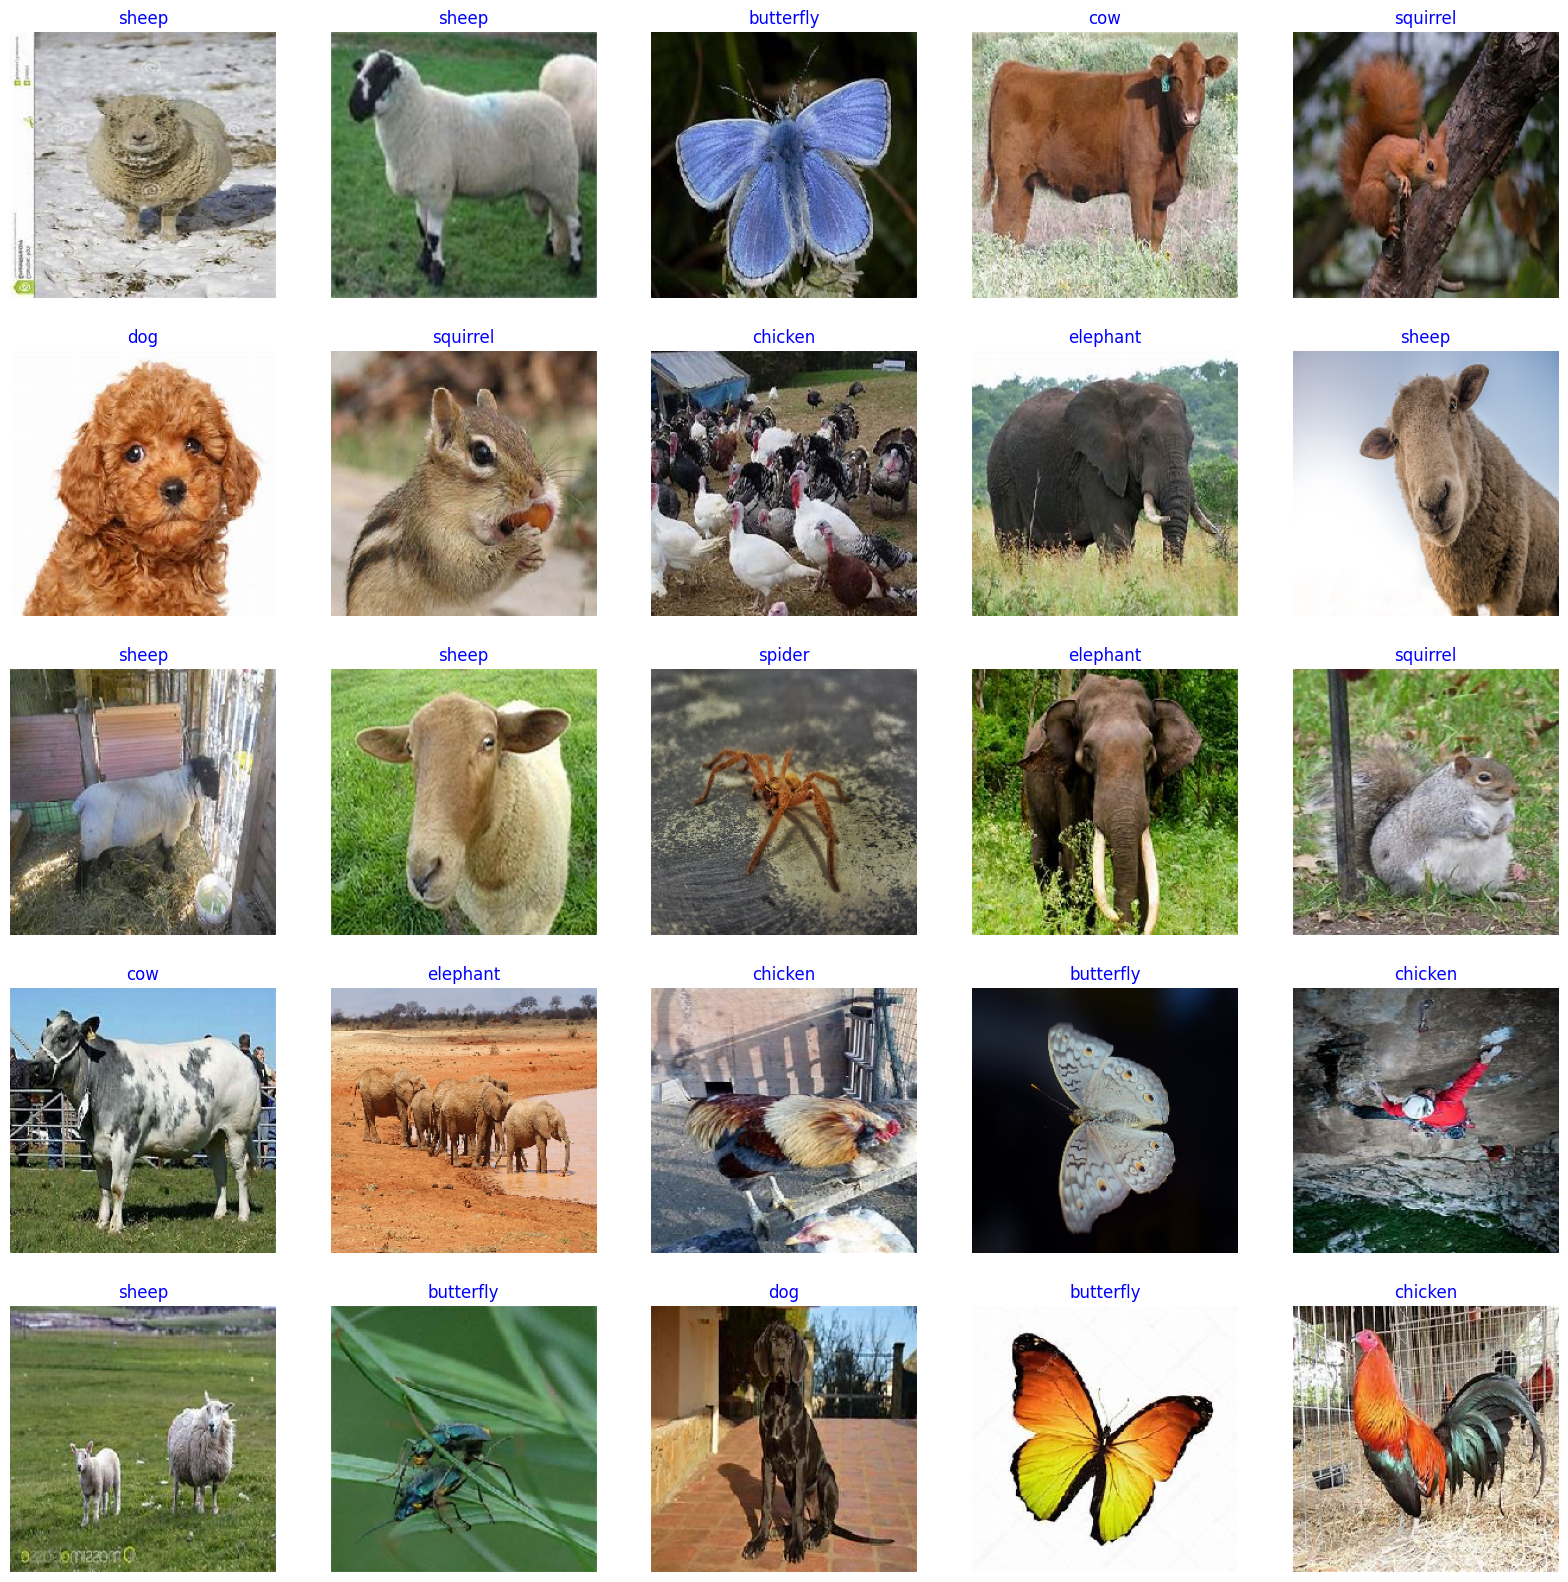

In [ ]:
show_images(train_gen)

#### Generic Model Creation

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))  # To define number of classes in the dense layer

# Create a pre-trained model. Here, we use EfficientNetB3 from the EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)

# Build the model using Sequential API
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                         

#### Set Callback Parameters

In [ ]:
# Setup callback
patience = 10
stop_patience = 5
threshold = 0.9
factor = 0.5
epochs = 5

callbacks = [
    MyCallback(model=model,
               patience=patience,
               stop_patience=stop_patience,
               threshold=threshold, factor=factor, epochs=epochs),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]


#### Train model

In this step, we train the model using the training data generator. We set the number of epochs and include callbacks for optimizing the training process and handling early stopping.

In [ ]:
# Training the model
history = model.fit(
    x=train_gen,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=valid_gen,
    validation_steps=None,
    shuffle=True  # It's generally better to shuffle training data
)

Epoch 1/5
655/655 [==============================] - 402s 522ms/step - loss: 3.9691 - accuracy: 0.9223 - val_loss: 1.4460 - val_accuracy: 0.9771
Epoch 2/5
655/655 [==============================] - 336s 513ms/step - loss: 0.8347 - accuracy: 0.9721 - val_loss: 0.4580 - val_accuracy: 0.9748
Epoch 3/5
655/655 [==============================] - 338s 517ms/step - loss: 0.3792 - accuracy: 0.9801 - val_loss: 0.3204 - val_accuracy: 0.9763
Epoch 4/5
655/655 [==============================] - 342s 521ms/step - loss: 0.2813 - accuracy: 0.9856 - val_loss: 0.2580 - val_accuracy: 0.9809
Epoch 5/5
655/655 [==============================] - 341s 521ms/step - loss: 0.2360 - accuracy: 0.9894 - val_loss: 0.2509 - val_accuracy: 0.9809


## Evaluation and Analysis

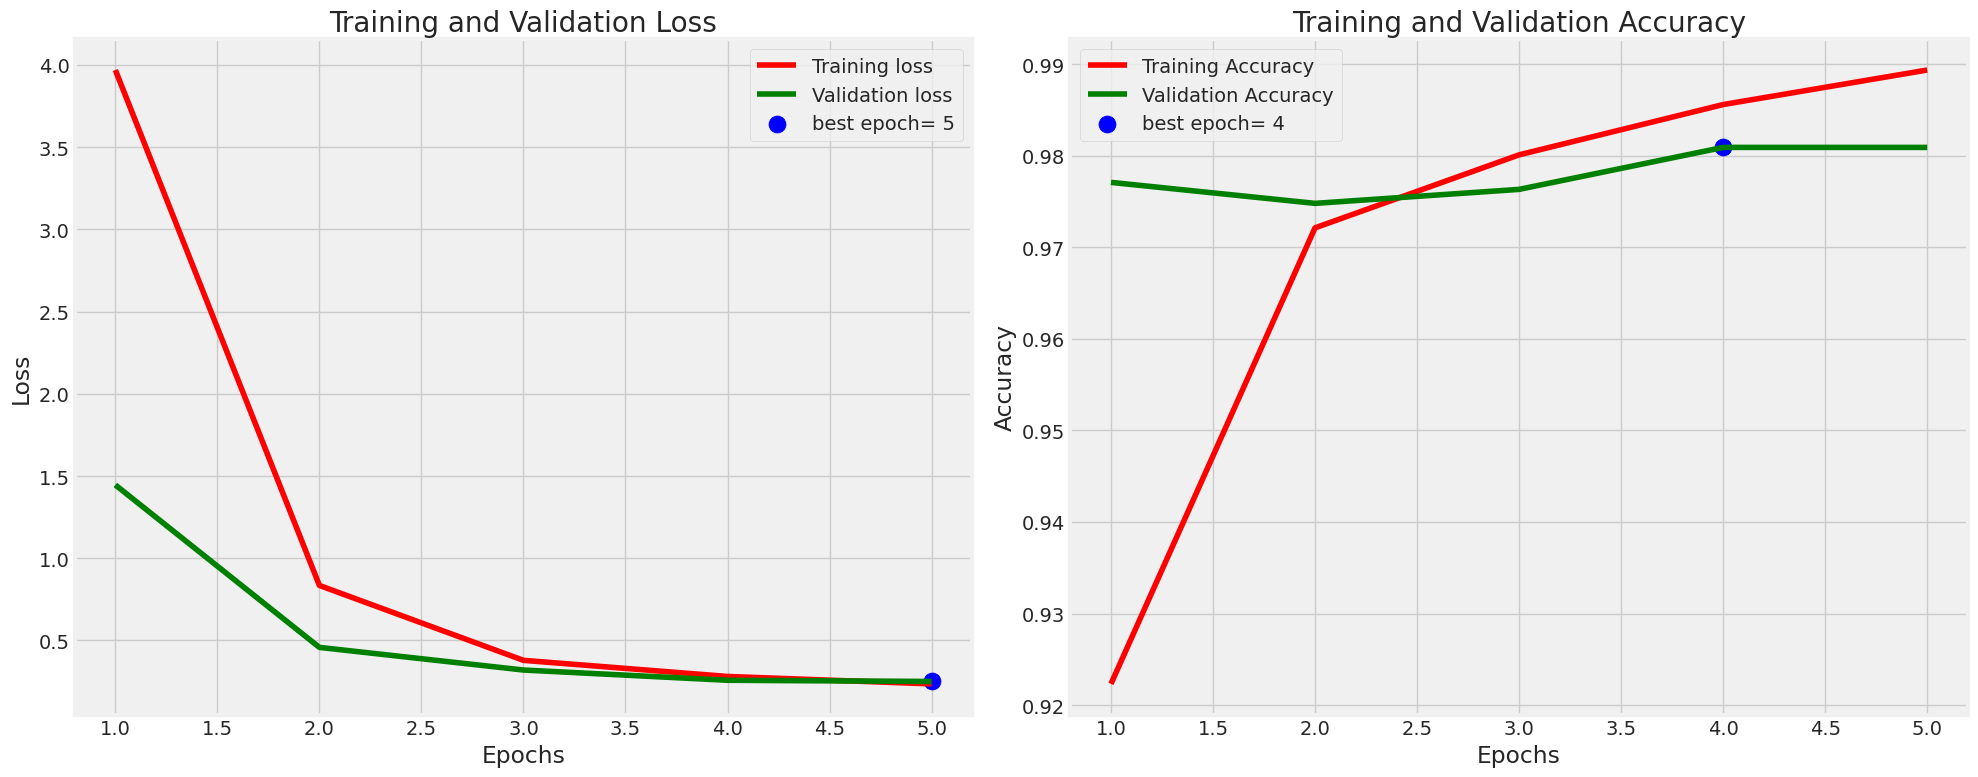

In [ ]:
plot_training(history)


The graphs illustrate the training and validation performance of the model over 5 epochs.

- **(Training and Validation Loss)**:
  - The red line represents the training loss, showing a significant decrease over the epochs.
  - The green line represents the validation loss, also decreasing and stabilizing, indicating good learning without overfitting.
  - The blue dot highlights the best epoch based on validation loss.

- **(Training and Validation Accuracy)**:
  - The red line represents the training accuracy, steadily increasing towards high accuracy.
  - The green line represents the validation accuracy, which also increases and stabilizes, suggesting the model's ability to generalize well on unseen data.
  - The blue dot marks the best epoch based on validation accuracy.

In [ ]:
# Determine optimal test batch size
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size

# Evaluate model on training, validation, and test data
train_score = model.evaluate(train_gen, steps=test_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=test_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Print evaluation results
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)

print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

34/34 [==============================] - 9s 261ms/step - loss: 0.2616 - accuracy: 0.9775
Train Loss:  0.17843328416347504
Train Accuracy:  0.9990808963775635
--------------------
Validation Loss:  0.24120604991912842
Validation Accuracy:  0.9834558963775635
--------------------
Test Loss:  0.26159027218818665
Test Accuracy:  0.9774637222290039


The model performs exceptionally well, with high accuracy and low loss on both training and validation data, indicating good learning and minimal overfitting. Consistent test results further confirm its robustness and reliability for practical use.

####  Confusion Matrix Analysis


[6 0 3 ... 0 2 9]
Confusion Matrix, Without Normalization
[[204   0   2   0   1   0   0   0   4   0]
 [  0 163   0   0   2   0   0   1   0   1]
 [  0   0 308   0   0   1   0   0   1   0]
 [  0   1   1 182   0   0   0   3   0   0]
 [  0   6   1   5 466   2   2   0   1   3]
 [  0   0   0   0   0 143   2   0   0   0]
 [  0   0   0   4   0   1 257   0   0   0]
 [  0   0   0   4   1   1   1 175   0   0]
 [  3   0   1   1   0   0   0   0 476   1]
 [  0   0   0   0   0   0   0   1   0 185]]
              precision    recall  f1-score   support

   butterfly       0.99      0.97      0.98       211
         cat       0.96      0.98      0.97       167
     chicken       0.98      0.99      0.99       310
         cow       0.93      0.97      0.95       187
         dog       0.99      0.96      0.97       486
    elephant       0.97      0.99      0.98       145
       horse       0.98      0.98      0.98       262
       sheep       0.97      0.96      0.97       182
      spider       0.99 

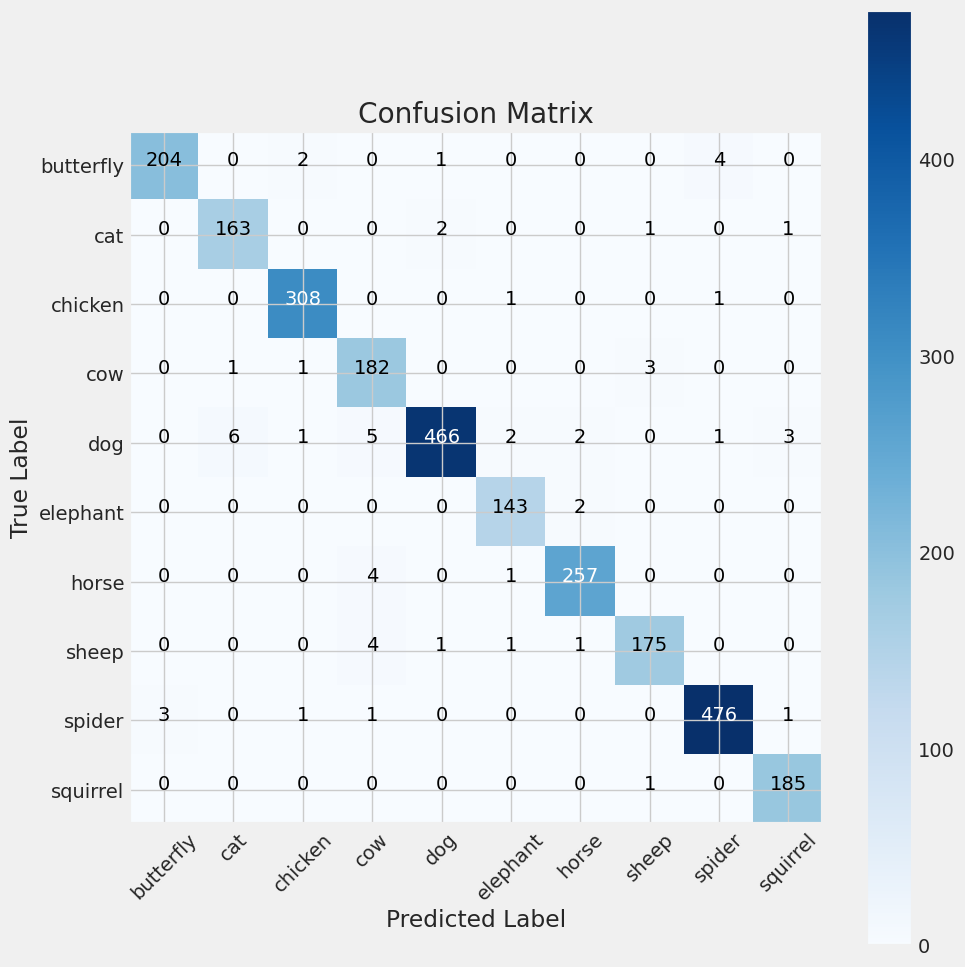

In [ ]:
# Get predictions
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))


1. **High Accuracy Across Most Classes**: The majority of predictions are correctly classified, with most diagonal elements (true positives) having significantly higher values compared to off-diagonal elements (misclassifications), indicating high accuracy.

2. **Minor Misclassifications**: There are a few misclassifications, particularly with similar-looking animals (e.g., a few instances of cows being misclassified as dogs or horses), but these are minimal and do not significantly impact the overall performance.

## Deploy the model

In [ ]:
model_name = model.input_names[0][:-6]
subject = 'eff'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{subject}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')


model was saved as eff.h5


# **Conclusion and Future Work** 📝🔮

In this project, we successfully developed an efficient animal classification model using EfficientNetB3, achieving a notable test accuracy of 97.7%. By leveraging a Kaggle dataset, conducting thorough data preparation and augmentation, and optimizing the model, we demonstrated its robustness and potential for real-world applications. This model can significantly impact wildlife conservation by aiding in animal population monitoring, automate livestock management in agriculture, and enhance security systems through precise animal identification.

**Future work** should focus on expanding the dataset to include more species and environments, fine-tuning hyperparameters for improved performance, and applying advanced data augmentation techniques. Additionally, integrating features such as audio or thermal data, deploying the model in real-world scenarios for feedback, and exploring lightweight variants for better efficiency on edge devices will further enhance the model's capabilities and applications.






# References

[1] TensorFlow. (2024). tf.keras.applications.EfficientNetB3. [Online]. Available: [https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB3](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB3).

[2] Szeliski, R. "Computer Vision: Algorithms and Applications," Springer-Verlag London, 2011. Available: [IEEE Xplore](https://ieeexplore.ieee.org/document/6126544).

[3] Kaggle. "Animals10 Dataset". Available: [Kaggle Animals10 Dataset](https://www.kaggle.com/datasets/alessiocorrado99/animals10).

[4] J. Hui. (2019). TensorFlow Dataset: Data Preparation. [Online]. Available: [https://jonathan-hui.medium.com/tensorflow-dataset-data-preparation-b81fcf9c3c44](https://jonathan-hui.medium.com/tensorflow-dataset-data-preparation-b81fcf9c3c44).

[5] TensorFlow. (2024). tf.keras.callbacks.Callback. [Online]. Available: [https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback).



*🟥Note: we've utilized ChatGPT for drafting specific sections of this notebook.*

Thank you !